<a href="https://colab.research.google.com/github/bilnazir/stockmarketprediction/blob/LSTM_netflix/fyp_LSTM_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=aed2de8aecb0eebaef5fe7cc2db2df95a385d634508014c7c5a67072b80eb96f
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'NFLX', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,15.392857,15.821429,15.078571,15.171429,15.171429,34559700
2012-03-13,15.411429,15.614286,15.021429,15.192857,15.192857,30739800
2012-03-14,15.117143,15.135714,14.700000,15.035714,15.035714,36208200
2012-03-15,15.050000,15.807143,15.000000,15.738571,15.738571,40880000
2012-03-16,15.751429,15.958571,15.365714,15.708571,15.708571,37198700
2012-03-19,15.644286,16.428572,15.544286,16.332857,16.332857,37095100
2012-03-20,16.272858,16.678572,16.158571,16.431429,16.431429,31507700
2012-03-21,16.571428,17.270000,16.517143,17.157143,17.157143,47321400
2012-03-22,17.147142,17.639999,16.838572,16.961430,16.961430,42754600


In [4]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

<ipython-input-4-bcaa738bef9c>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [5]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

data_set.head(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,9.557143,9.585714,9.318571,9.425714,57.605156,8.845091,9.822803,10.812571,-0.210000,0,9.190000
1,9.400000,9.514286,9.108571,9.190000,54.624874,8.877939,9.810272,10.791080,-0.055715,0,9.251429
2,9.307143,9.311429,9.057143,9.251429,55.271029,8.913510,9.799206,10.770688,0.164285,1,9.435714
3,9.271429,9.458571,9.108571,9.435714,57.228748,8.963243,9.792008,10.753006,0.358571,1,9.788571
4,9.430000,9.831429,9.377143,9.788571,60.752802,9.041846,9.791940,10.740232,-0.161428,0,9.622857
5,9.784286,9.977143,9.564286,9.622857,58.334344,9.097180,9.788592,10.725432,-0.315714,0,9.282857
6,9.598571,9.642857,9.180000,9.282857,53.640313,9.114864,9.778577,10.706325,0.502856,1,9.697143
7,9.194286,9.961429,9.184286,9.697143,58.047519,9.170319,9.776964,10.692959,0.131428,1,9.745714
8,9.614286,9.878571,9.437143,9.745714,58.542593,9.225119,9.776346,10.680412,0.322857,1,8.588571
9,8.265714,8.714286,8.200000,8.588571,44.990607,9.164495,9.752825,10.652706,0.208571,1,8.787143


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[1.88782229e-03 1.25878820e-03 1.65007780e-03 ... 4.33493757e-01
  0.00000000e+00 8.80438772e-04]
 [1.65810850e-03 1.15560923e-03 1.34029298e-03 ... 4.35076009e-01
  0.00000000e+00 9.70365422e-04]
 [1.52237024e-03 8.62579994e-04 1.26442840e-03 ... 4.37332180e-01
  1.00000000e+00 1.24014258e-03]
 ...
 [2.45604664e-01 2.55975634e-01 2.42635216e-01 ... 4.23956281e-01
  0.00000000e+00 2.56874629e-01]
 [2.58643990e-01 2.56408992e-01 2.54643085e-01 ... 4.86924169e-01
  1.00000000e+00 2.64501618e-01]
 [2.57284519e-01 2.62172599e-01 2.58596517e-01 ... 4.45492437e-01
  1.00000000e+00 2.61149248e-01]]


In [7]:
# multiple feature from data provided to the model
X = []
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[1.88782229e-03 1.25878820e-03 1.65007780e-03 ... 0.00000000e+00
   1.48248366e-04 3.32412774e-04]
  [1.65810850e-03 1.15560923e-03 1.34029298e-03 ... 4.98613362e-05
   1.27399094e-04 2.95529204e-04]
  [1.52237024e-03 8.62579994e-04 1.26442840e-03 ... 1.03854390e-04
   1.08986611e-04 2.60530535e-04]
  ...
  [5.14556562e-03 4.86181163e-03 5.28952219e-03 ... 3.24011392e-03
   7.33457909e-04 2.32782690e-04]
  [5.33560085e-03 4.69466136e-03 5.22208591e-03 ... 3.36593296e-03
   7.88660678e-04 2.57684662e-04]
  [5.16644907e-03 4.51512928e-03 4.77742855e-03 ... 3.46138895e-03
   8.38581283e-04 2.79366651e-04]]

 [[1.65810850e-03 1.15560923e-03 1.34029298e-03 ... 4.98613362e-05
   1.27399094e-04 2.95529204e-04]
  [1.52237024e-03 8.62579994e-04 1.26442840e-03 ... 1.03854390e-04
   1.08986611e-04 2.60530535e-04]
  [1.47016300e-03 1.07512885e-03 1.34029298e-03 ... 1.79346223e-04
   9.70104649e-05 2.30184511e-04]
  ...
  [5.33560085e-03 4.69466136e-03 5.22208591e-03 ... 3.36593296e-03
   7.

In [8]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.00462387]
 [0.00444611]
 [0.00451512]
 ...
 [0.71736261]
 [0.73349494]
 [0.72247164]]


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
history = model.fit( X_train,
    y_train,
    batch_size=64,
    epochs=128,
    validation_data=(X_test, y_test),
    verbose=1,)

Epoch 1/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0921 - val_loss: 0.0081 - val_mean_absolute_error: 0.0780
Epoch 2/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4734e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0037 - val_mean_absolute_error: 0.0450
Epoch 3/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7984e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0028 - val_mean_absolute_error: 0.0368
Epoch 4/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1833e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0021 - val_mean_absolute_error: 0.0317
Epoch 5/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6396e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0020 - val_mean_absolute_error: 0.0304
Epoch 6/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5692e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0016 - val_mean_absolute_error: 0.0271
Epoch 7/128
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8108e-04 - mean_absolute

In [11]:
# Convert training history to datafram for viewing and graphing.
hist = pd.DataFrame(history.history)
hist.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.007539,0.053121,0.008072,0.077988
1,0.000578,0.015580,0.003664,0.044967
2,0.000366,0.011955,0.002757,0.036815
3,0.000309,0.010937,0.002136,0.031733
4,0.000276,0.010324,0.001980,0.030401


<Axes: >

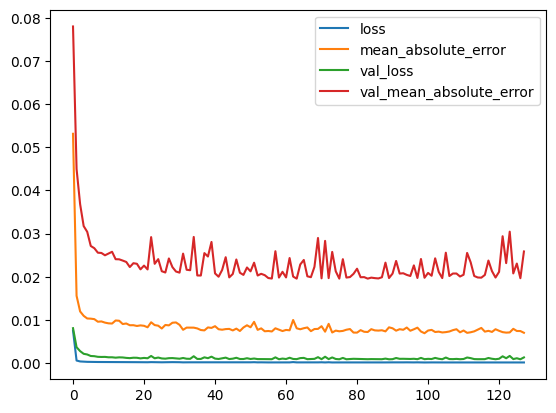

In [12]:
# Training errors with respect to ecochs.
# loss: values of the cost function for training data.
# val_loss: values of the cost function for cross-validation data.
hist.plot()

In [13]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[0.7388587] [0.73267511]
[0.73066866] [0.71166802]
[0.73539734] [0.69505261]
[0.71707034] [0.67097125]
[0.70092165] [0.68347307]
[0.6810722] [0.69205157]
[0.6930629] [0.69402786]
[0.7074017] [0.69354478]
[0.71561754] [0.70748121]
[0.71742916] [0.6967361]


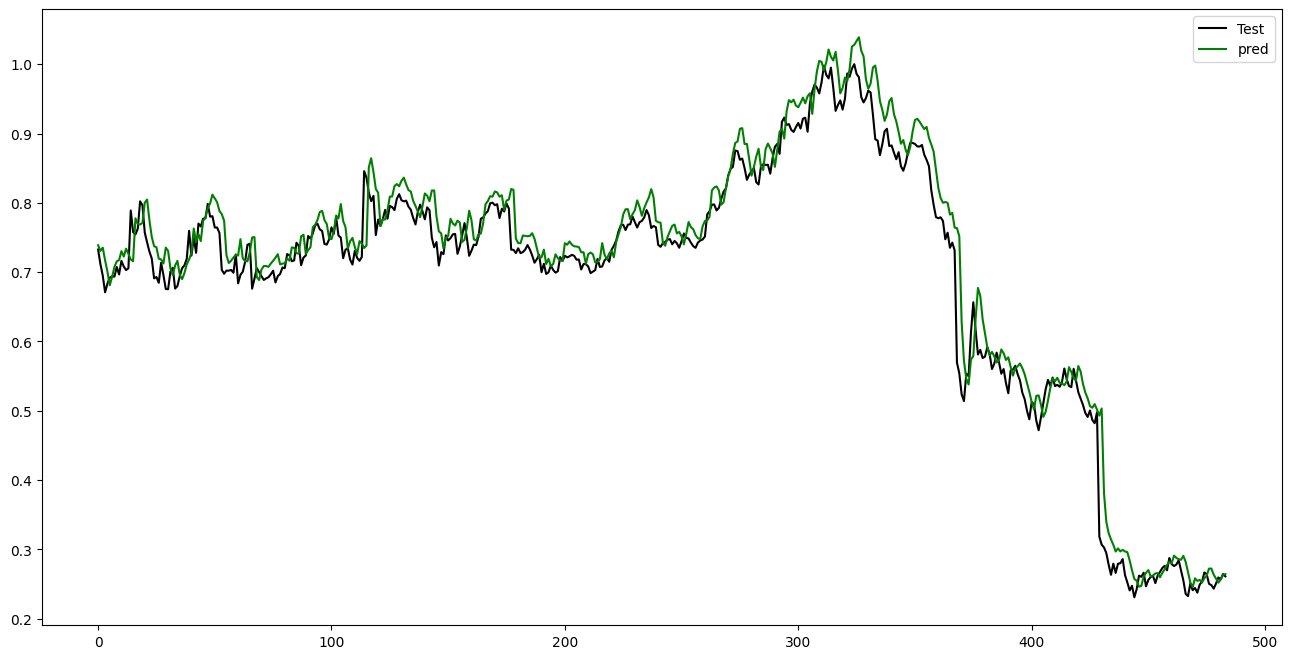

In [14]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0259
Mean Squared Error (MSE): 0.0013
Root Mean Squared Error (RMSE): 0.0361
R-squared (R2) score: 0.9625


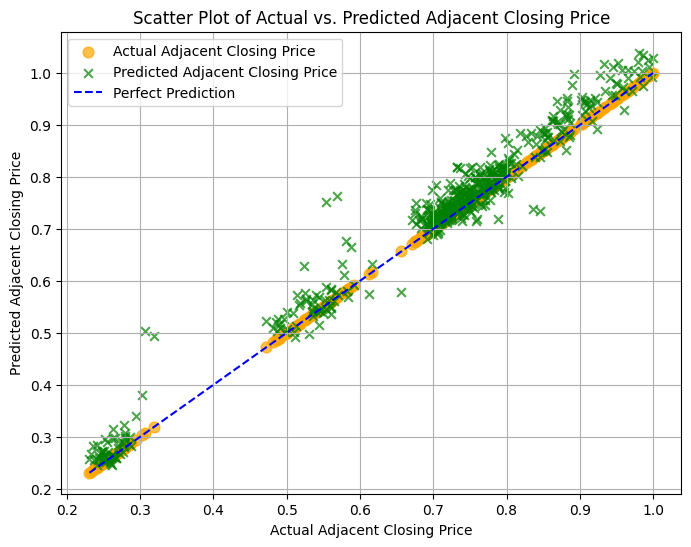

In [16]:
# Scatter plot of actual vs. predicted adjacent closing prices
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

# Plot actual values as orange circles with larger markers
plt.scatter(y_test, y_test, color='orange', label='Actual Adjacent Closing Price', alpha=0.7, s=60)

# Plot predicted values as black crosses with smaller markers
plt.scatter(y_test, y_pred, color='green', label='Predicted Adjacent Closing Price', alpha=0.7, s=40, marker='x')

# Plot the diagonal line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Adjacent Closing Price')
plt.ylabel('Predicted Adjacent Closing Price')
plt.title('Scatter Plot of Actual vs. Predicted Adjacent Closing Price')
plt.legend()
plt.grid(True)  # Add grid lines for better readability
plt.show()

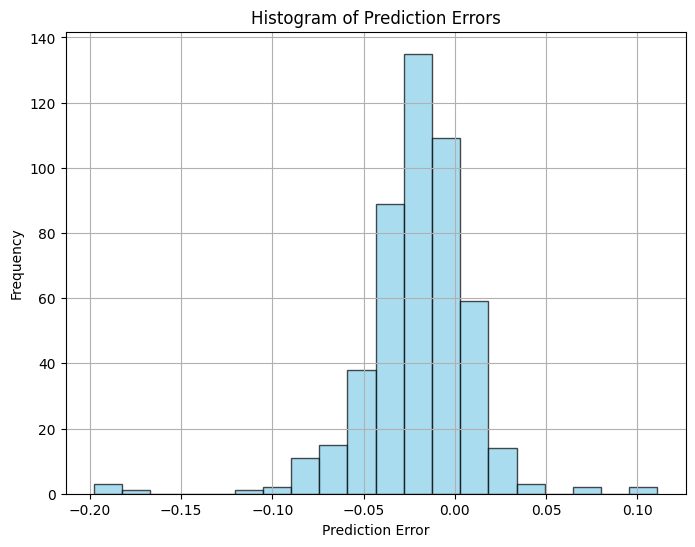

In [17]:
# Histogram of prediction errors
errors = y_test - y_pred

plt.figure(figsize=(8, 6))  # Increase figure size for better visibility

plt.hist(errors, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')

# Add grid lines for better readability
plt.grid(True)

plt.show()